# 演示使用扩展板的beep进行音乐演奏
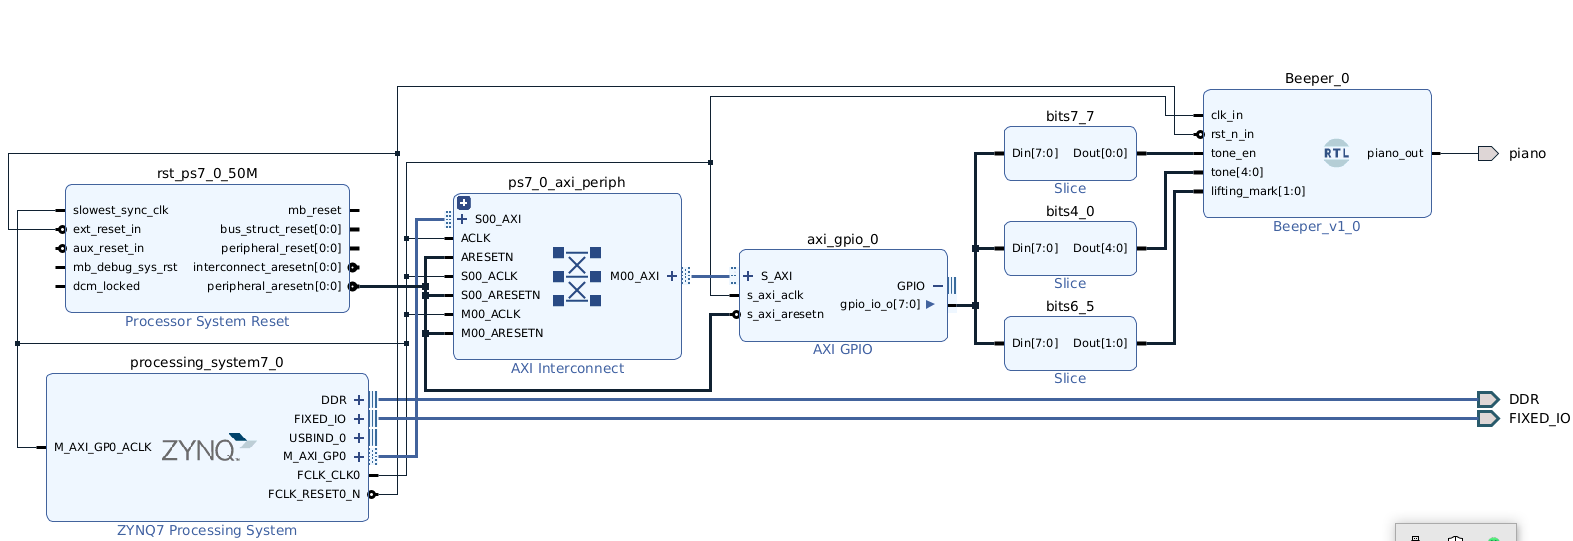
使用了https://github.com/Storm-Rage0/electronic-organ  的pwm模块
但注意上述模块的enable设计有误，无法暂停，使用rst引脚控制

In [1]:
from pynq import Overlay
piano = Overlay("./overlay/piano.bit")

In [2]:
from pynq.lib import AxiGPIO
from time import sleep

axi_gpio = piano.ip_dict['axi_gpio_0']
piano_gpio = AxiGPIO(axi_gpio).channel1



In [3]:
stop = 0b000000000
tone_L1 = 0b110000001

In [4]:
# 写入音乐简谱,多的休止符用‘0’ 指示
liteStar = [1,1,5,5,6,6,5,0,4,4,3,3,2,2,1,0,5,5,4,4,3,3,2,0,5,5,4,4,3,3,2,0,1,1,5,5,6,6,5,0,4,4,3,3,2,2,1]

In [5]:
birthday = [5,5,6,5,8,7,0,5,5,6,5,9,8,0,5,5,12,10,8,7,6,11,11,13,8,9,9,8]

In [6]:
play_song = liteStar

In [7]:
for i in range(len(play_song)):
    if liteStar[i]=='0':
        piano_gpio[0:9].write(stop)
        sleep(0.6)
    piano_gpio[0:9].write(tone_L1 + play_song[i] -1)
    sleep(0.6)
    piano_gpio[0:9].write(stop)
    sleep(0.1)

       